In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('superstore_dataset2011-2015.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [3]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.head(2
       )

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [6]:
data=df.drop(columns=(['Order ID','Ship Date','Customer Name','Postal Code','Product ID',]))

In [7]:
data

,Row ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,1/1/2011,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,1/1/2011,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,1/1/2011,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,1/1/2011,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,1/1/2011,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,31-12-2014,Standard Class,EB-13975,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,31-12-2014,Standard Class,LP-7095,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,31-12-2014,Second Class,CM-12190,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,31-12-2014,Standard Class,TD-20995,Consumer,Ju�rez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


### Feature engineering

In [8]:
import datetime as dt
data['Order Date']=pd.to_datetime(df['Order Date'])
data['years']=data['Order Date'].dt.year
data['months']=data['Order Date'].dt.month
data['days']=data['Order Date'].dt.day
data['hours']=data['Order Date'].dt.hour

In [9]:
data=data.drop(columns=(['Row ID']))
data

,Order Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,years,months,days,hours
0,2011-01-01,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011,1,1,0
1,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011,1,1,0
2,2011-01-01,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011,1,1,0
3,2011-01-01,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011,1,1,0
4,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,Standard Class,EB-13975,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014,12,31,0
51286,2014-12-31,Standard Class,LP-7095,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014,12,31,0
51287,2014-12-31,Second Class,CM-12190,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014,12,31,0
51288,2014-12-31,Standard Class,TD-20995,Consumer,Ju�rez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,2014,12,31,0


### EDA (Exploratory Data Analysis)

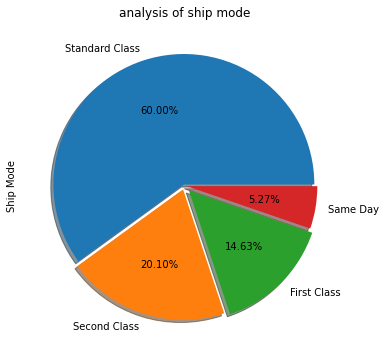

In [10]:
plt.figure(figsize=(8,6))
data['Ship Mode'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0.01,0.03,0.05,0.02],shadow=0.5)
plt.title('analysis of ship mode')
plt.show()

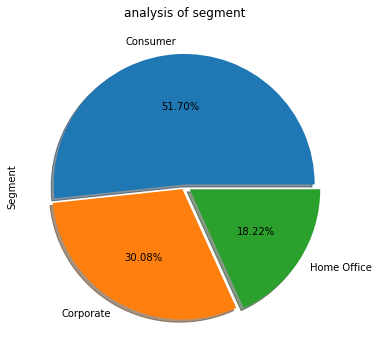

In [11]:
plt.figure(figsize=(8,6))
data['Segment'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0.01,0.03,0.05],shadow=0.5)
plt.title('analysis of segment')
plt.show()

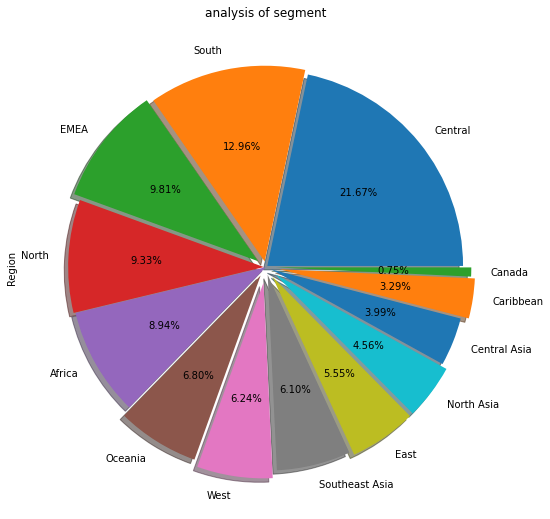

In [12]:
plt.figure(figsize=(12,9))
data['Region'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0.01,0.03,0.05,0.01,0,0.05,0.08,0.04,0.06,0.06,0.03,0.07,0.05],shadow=0.7)
plt.title('analysis of segment')
plt.show()

In [13]:
data.groupby('Region')['Sales'].mean().sort_values(ascending=False).reset_index(name='avg sale')

,Region,avg sale
0,Central Asia,367.591097
1,North Asia,362.835663
2,Oceania,315.510356
3,Southeast Asia,282.653617
4,North,260.849656
5,Central,253.872674
6,South,240.919043
7,East,238.336110
8,West,226.493233
9,Caribbean,191.882166


### top 10 product by sales

In [14]:
data.groupby(['Product Name'])['Sales'].sum().head(10).sort_values(ascending=False).reset_index(name='total_sales')

,Product Name,total_sales
0,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2706.080
1,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
2,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
3,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",176.288
4,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
5,#10 Self-Seal White Envelopes,108.682
6,#6 3/4 Gummed Flap White Envelopes,71.280
7,1/4 Fold Party Design Invitations & White Enve...,49.980
8,"#10 Gummed Flap White Envelopes, 100/Box",41.300
9,"""While you Were Out"" Message Book, One Form pe...",25.228


In [15]:
sales=data.groupby(['years','months']).sum()
sales

Sales  Quantity  Discount       Profit  Shipping Cost  \
years months                                                                 
2011  1       138241.30042      2178    97.596  13457.23302       14803.89   
      2       134969.94086      1794    78.516  17588.83726       15052.66   
      3       171455.59372      2183    90.814  16169.36062       17017.34   
      4       128833.47034      2181    86.630  13405.46924       14475.01   
      5       148146.72092      2057    80.052  14777.45792       15537.48   
      6       189338.43966      2715   133.926  25932.87796       21237.52   
      7       162034.69756      2266    97.140  10631.84406       17412.04   
      8       219223.49524      2909   128.130  19650.67124       21355.71   
      9       255237.89698      3357   126.194  32313.25458       29007.39   
      10      204675.07846      2615    97.464  30745.54166       22452.57   
      11      214934.29386      3165   138.840  21261.40536       23557.61   
      12      292359.96752      4023   178.092  33006.85862       32361.86   
2012  1       162800.89338      2150    84.290  19627.42058       15130.57   
      2       152661.15144      2156    98.642  17828.18244       16084.90   
      3       201608.72784      2880   122.492  22752.87684       20864.86   
      4       187469.96192      2506    97.904  20804.00532       19323.04   
      5       218960.16042      3239   140.848  22865.39572       24990.92   
      6       249289.77172      3508   145.498  34358.03962       28238.16   
      7       174394.02808      2551   108.790  21725.18808       21650.76   
      8       271669.66086      3451   138.920  36511.44996       27509.91   
      9       256567.85308      3752   154.692  25039.93498       25303.76   
      10      239321.09904      3399   119.942  27773.87454       23807.53   
      11      270723.05356      4497   182.176  26160.60686       29089.16   
      12      291972.33306      4022   154.580  31968.30416       31498.32   
2013  1       206459.19582      2766   110.106  26052.40252       22985.06   
      2       191062.77216      2535   101.234  31553.99756       20282.73   
      3       230547.79468      3130   136.134  34873.71938       23021.52   
      4       233181.34844      3161   127.946  26008.05144       24114.32   
      5       304509.96336      4115   159.898  39053.30946       32829.61   
      6       341162.34370      4948   192.106  43298.85000       37474.69   
      7       223642.65664      3594   141.910  27019.91294       24558.16   
      8       323876.60716      4564   185.740  32977.75576       35205.10   
      9       326897.27044      5067   220.746  18850.09084       34530.11   
      10      270121.87570      3977   163.606  27871.97470       30587.70   
      11      383039.21248      5274   190.164  51720.88568       41188.22   
      12      371245.40880      5005   205.932  47654.27990       37772.73   
2014  1       268265.52240      3656   153.674  31447.74660       29663.87   
      2       244159.30486      3450   133.726  29454.01876       24858.73   
      3       347720.96868      4820   191.644  50097.04458       36740.41   
      4       302132.54000      4397   194.276  35709.53320       31886.76   
      5       304798.83604      4415   175.984  34335.60404       34378.04   
      6       372577.23298      5528   220.046  40869.02108       37237.19   
      7       278672.17326      3867   165.000  26450.70856       31036.12   
      8       432731.04194      5506   223.994  46443.47934       44745.03   
      9       405436.70584      5741   234.542  52533.83284       43936.34   
      10      406659.41500      5915   245.664  52342.49740       42520.15   
      11      508954.73156      7020   293.400  55561.72406       55815.84   
      12      427757.39800      6307   280.088  48920.76000       47689.29   

               days  hours  
years months                
2011  1        8671      0  
      2        6721      0  
    

In [16]:
year_2011 = sales.loc[(2011,slice(None)),:].reset_index()
year_2012 = sales.loc[(2012,slice(None)),:].reset_index()
year_2013 = sales.loc[(2013,slice(None)),:].reset_index()
year_2014 = sales.loc[(2014,slice(None)),:].reset_index()
year_2011

,years,months,Sales,Quantity,Discount,Profit,Shipping Cost,days,hours
0,2011,1,138241.30042,2178,97.596,13457.23302,14803.89,8671,0
1,2011,2,134969.94086,1794,78.516,17588.83726,15052.66,6721,0
2,2011,3,171455.59372,2183,90.814,16169.36062,17017.34,9879,0
3,2011,4,128833.47034,2181,86.630,13405.46924,14475.01,9262,0
4,2011,5,148146.72092,2057,80.052,14777.45792,15537.48,9023,0
5,2011,6,189338.43966,2715,133.926,25932.87796,21237.52,13573,0
6,2011,7,162034.69756,2266,97.140,10631.84406,17412.04,9863,0
7,2011,8,219223.49524,2909,128.130,19650.67124,21355.71,13740,0
8,2011,9,255237.89698,3357,126.194,32313.25458,29007.39,16562,0
9,2011,10,204675.07846,2615,97.464,30745.54166,22452.57,11821,0


In [17]:
profit=pd.concat([year_2011['Profit'],year_2012['Profit'],year_2013['Profit'],year_2014['Profit']],axis=1)
profit=profit.rename(columns={'Profit':'profit_2011','Profit':'profit_2012','Profit':'profit_2013','Profit':'profit_2014'})

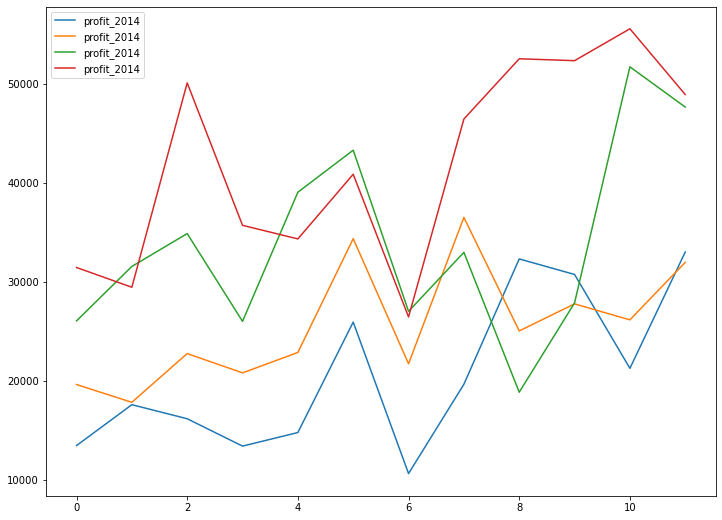

In [18]:
profit.plot(kind='line',figsize=(12,9))
plt.show()

In [19]:
data.groupby(['Market','years'])['Sales'].sum().reset_index(name='sales').sort_values(ascending=False,by='sales')

,Market,years,sales
3,APAC,2014,1.209199e+06
19,EU,2014,1.042204e+06
2,APAC,2013,9.745809e+05
1,APAC,2012,7.627193e+05
18,EU,2013,7.616804e+05
27,US,2014,7.339470e+05
23,LATAM,2014,7.066329e+05
17,EU,2012,6.554617e+05
0,APAC,2011,6.392453e+05
26,US,2013,6.084738e+05


In [20]:
## top 10 customers which are generate more revenue

In [21]:
data.groupby('Customer ID')['Sales'].sum().reset_index(name='sales').sort_values(ascending=False,by='sales').head(10)

,Customer ID,sales
1463,TA-21385,35668.12080
623,GT-14710,34471.89028
1489,TC-20980,34218.26900
1405,SM-20320,31125.29496
237,BW-11110,30613.61650
656,HL-15040,29664.23058
1369,SE-20110,29532.62502
1220,PS-19045,29252.31940
1243,RB-19360,29197.63460
1587,ZC-21910,28472.81926


### top 15 countries have highest shiping cost

In [22]:
data.groupby(['Country'])['Shipping Cost'].sum().sort_values(ascending=False,).reset_index(name='highest_shiping cost').head(15)

,Country,highest_shiping cost
0,United States,238173.79
1,Australia,100359.02
2,France,95387.81
3,China,78957.02
4,Mexico,67659.85
5,Germany,63965.18
6,India,61780.72
7,United Kingdom,53580.27
8,Indonesia,43948.62
9,Brazil,38170.73


In [23]:
india=data[data['Country']=='India']
india

,Order Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,years,months,days,hours
128,2011-01-06,Standard Class,MC-17425,Corporate,Jaipur,Rajasthan,India,APAC,Central Asia,Office Supplies,Envelopes,"Kraft Clasp Envelope, with clear poly window",62.70,5,0.0,9.90,4.18,Medium,2011,1,6,0
252,2011-01-11,Standard Class,BD-11635,Consumer,Ludhiana,Punjab,India,APAC,Central Asia,Furniture,Chairs,"Novimex Chairmat, Black",323.46,6,0.0,138.96,22.45,High,2011,1,11,0
255,2011-01-11,Standard Class,BD-11635,Consumer,Ludhiana,Punjab,India,APAC,Central Asia,Office Supplies,Binders,"Acco Binding Machine, Economy",255.45,5,0.0,28.05,16.86,High,2011,1,11,0
443,2011-02-06,Standard Class,JG-15805,Corporate,Agra,Uttar Pradesh,India,APAC,Central Asia,Technology,Accessories,"Memorex Router, Erganomic",976.08,4,0.0,361.08,51.72,Medium,2011,2,6,0
462,2011-02-06,Standard Class,JG-15805,Corporate,Agra,Uttar Pradesh,India,APAC,Central Asia,Office Supplies,Binders,"Ibico Binder Covers, Recycled",112.08,8,0.0,4.32,7.02,Medium,2011,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51237,2014-12-31,Second Class,BS-11365,Corporate,Vijayawada,Andhra Pradesh,India,APAC,Central Asia,Office Supplies,Supplies,"Kleencut Letter Opener, Easy Grip",258.12,9,0.0,92.88,46.11,Medium,2014,12,31,0
51245,2014-12-31,Second Class,BS-11365,Corporate,Vijayawada,Andhra Pradesh,India,APAC,Central Asia,Technology,Accessories,"Memorex Keyboard, Erganomic",276.60,4,0.0,105.00,21.84,Medium,2014,12,31,0
51269,2014-12-31,Second Class,BS-11365,Corporate,Vijayawada,Andhra Pradesh,India,APAC,Central Asia,Furniture,Bookcases,"Dania Corner Shelving, Metal",364.59,3,0.0,153.09,4.12,Medium,2014,12,31,0
51271,2014-12-31,Second Class,BS-11365,Corporate,Vijayawada,Andhra Pradesh,India,APAC,Central Asia,Office Supplies,Storage,"Rogers Box, Single Width",72.00,3,0.0,4.32,3.88,Medium,2014,12,31,0


In [24]:
# top citis  of India who buil more revenue

In [25]:
india.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index(name='city_sales').head(10)

,City,city_sales
0,Delhi,31014.63
1,Gorakhpur,22636.17
2,Pune,19749.87
3,Hyderabad,12925.65
4,Bangalore,12499.98
5,Agra,12399.45
6,Surat,12215.58
7,Nagpur,11745.96
8,Thane,11543.07
9,Chennai,11513.88


In [26]:
india.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index(name='city_sales').head(10)

,State,city_sales
0,Maharashtra,101322.405
1,Uttar Pradesh,76295.160
2,Tamil Nadu,51911.460
3,Karnataka,31802.400
4,Delhi,31026.030
5,Rajasthan,30992.790
6,Gujarat,29290.350
7,Bihar,28615.140
8,Madhya Pradesh,27069.780
9,Haryana,24657.420


In [27]:
## Global citis 

In [28]:
data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index(name='city_sales').head(10)

,City,city_sales
0,New York City,256368.16100
1,Los Angeles,175851.34100
2,Manila,120886.94850
3,Seattle,119540.74200
4,San Francisco,112669.09200
5,Philadelphia,109077.01300
6,Sydney,101945.51700
7,Jakarta,94321.32420
8,London,86945.80500
9,Mexico City,85728.55176


In [29]:
top_city=data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index(name='city_sales').head(10)
top_city

,City,city_sales
0,New York City,256368.16100
1,Los Angeles,175851.34100
2,Manila,120886.94850
3,Seattle,119540.74200
4,San Francisco,112669.09200
5,Philadelphia,109077.01300
6,Sydney,101945.51700
7,Jakarta,94321.32420
8,London,86945.80500
9,Mexico City,85728.55176
